In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
# os.listdir()

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

## Data Read

In [4]:
df=pd.read_csv("Mice Protein Expression.csv")

In [5]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [6]:
# replace to '?' to np.nan
# so real missing values can be count
mymap = {"?":np.NaN}

df=df.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [7]:
df.isnull().sum().sort_values(ascending=False) # missing datas can be observed

BCL2_N       285
H3MeK4_N     270
BAD_N        213
EGR1_N       210
H3AcK18_N    180
            ... 
nNOS_N         0
Tau_N          0
GFAP_N         0
GluR3_N        0
class          0
Length: 82, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [9]:
df=df.drop(['MouseID'],axis=1)

In [10]:
df["Genotype"] = df["Genotype"].str.strip("'")
df["Genotype"].value_counts() #Observations that are all values should be dropped

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [11]:
df["Treatment"] = df["Treatment"].str.strip("'")
df["Treatment"].value_counts() # Observations that are all values should be dropped

Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [12]:
df["Behavior"] = df["Behavior"].str.strip("'")
df["Behavior"].value_counts() # Observations that are all values should be dropped

S/C    555
C/S    525
Name: Behavior, dtype: int64

In [13]:
df["class"] = df["class"].str.strip("'")
df["class"].value_counts() # Observations that are all values should be dropped

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [14]:
df[['Genotype']] = df[['Genotype']].replace(to_replace={'Control':1,'Ts65Dn':0})

In [15]:
df[['Treatment']] = df[['Treatment']].replace(to_replace={'Memantine':1,'Saline':0})

In [16]:
df[['Behavior']] = df[['Behavior']].replace(to_replace={'S/C':1,'C/S':0})

In [17]:
y=df['class']

In [18]:
df = df.drop(["class"], axis=1)

In [19]:
df.shape

(1080, 80)

In [20]:
print(df["Genotype"].value_counts())
print(df["Treatment"].value_counts())
print(df["Behavior"].value_counts())

1    570
0    510
Name: Genotype, dtype: int64
1    570
0    510
Name: Treatment, dtype: int64
1    555
0    525
Name: Behavior, dtype: int64


In [21]:
df=df.apply(lambda x: x.astype(float))

In [22]:
!pip install ycimpute==0.1.1

In [23]:
from ycimpute.imputer import knnimput

In [24]:
var_names = list(df) # variable names are stored dataset will be converted to matrix so
# We kept it in a list so that it doesn't get lost ..

In [25]:
n_df = np.array(df) # Converted dataframe to Numpy array
# Some libraries accept numpy array some DataFrame some all kinds

In [26]:
n_df

array([[0.50364388, 0.74719322, 0.4301753 , ..., 1.        , 1.        ,
        0.        ],
       [0.51461708, 0.68906355, 0.41177034, ..., 1.        , 1.        ,
        0.        ],
       [0.50918309, 0.7302468 , 0.41830878, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.22869955, 0.39517937, 0.23411809, ..., 0.        , 0.        ,
        1.        ],
       [0.22124241, 0.41289438, 0.24397413, ..., 0.        , 0.        ,
        1.        ],
       [0.30262572, 0.46105919, 0.25656431, ..., 0.        , 0.        ,
        1.        ]])

In [27]:
n_df.shape

(1080, 80)

In [28]:
dff = knnimput.KNN(k=20).complete(n_df)
# Filling in NaN expressions according to estimation of missing values in Array format

Imputing row 1/1080 with 1 missing, elapsed time: 0.340
Imputing row 101/1080 with 0 missing, elapsed time: 0.342
Imputing row 201/1080 with 3 missing, elapsed time: 0.345
Imputing row 301/1080 with 2 missing, elapsed time: 0.348
Imputing row 401/1080 with 0 missing, elapsed time: 0.350
Imputing row 501/1080 with 0 missing, elapsed time: 0.352
Imputing row 601/1080 with 4 missing, elapsed time: 0.354
Imputing row 701/1080 with 0 missing, elapsed time: 0.355
Imputing row 801/1080 with 2 missing, elapsed time: 0.358
Imputing row 901/1080 with 0 missing, elapsed time: 0.360
Imputing row 1001/1080 with 0 missing, elapsed time: 0.362


In [29]:
dff = pd.DataFrame(dff, columns = var_names) # Converting Array to Pandas DataFrame

In [30]:
dff.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,1.0,1.0,0.0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,1.0,1.0,0.0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,1.0,1.0,0.0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,1.0,1.0,0.0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,1.0,1.0,0.0


In [31]:
dff.isnull().sum().sort_values(ascending=False) # There is no missing data left.

DYRK1A_N    0
ITSN1_N     0
GluR3_N     0
GFAP_N      0
Tau_N       0
           ..
GSK3B_N     0
ERK_N       0
ELK_N       0
CREB_N      0
Behavior    0
Length: 80, dtype: int64

In [32]:
df=dff

In [33]:
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,1.0,1.0,0.0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,1.0,1.0,0.0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,1.0,1.0,0.0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,1.0,1.0,0.0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,1.0,1.0,0.0


In [34]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


# label encoder y
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)

In [35]:
print(y)

y.shape

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


(1080, 8)

In [36]:
X = df
X = np.array(X)

## Modelling



## Artificial Neural Network with MLP

In [37]:
from sklearn.model_selection import GridSearchCV



# Train-Test 
from sklearn.model_selection import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Multi Layer Perceptron Artificial Neural Network
from sklearn.neural_network import MLPClassifier 

# Setting up a primitive (non-validated) model
mlpc = MLPClassifier(random_state = 0)# ANN model object created

mlpc.fit(X_train, y_train) # ANN model object fit

MLPClassifier(random_state=0)

In [38]:
# Untunned Scores of the Model

y_pred=mlpc.predict(X_test)

In [39]:
import sklearn.metrics as metrics

# Accuracy

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

# f1 score

print("f1_weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.9907407407407407
f1_weighted: 0.9952873405254359


In [40]:
# Cross Validation Process
# Parameters for CV created in dictionary structure
# INFORMATION ABOUT THE INPUTED PARAMETERS
# alpha: float, default = 0.0001 L2 penalty (regularization term) parameter. (penalty parameter)
   
mlpc_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

from sklearn.model_selection import GridSearchCV




mlpc = MLPClassifier(random_state = 0) # ANN model object created

# Model CV process 
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 5, # To make a 5-fold CV
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2) # Controls the level of detail: higher means more messages gets value as integer.

mlpc_cv_model.fit(X_train, y_train) 


# The best parameter obtained as a result of CV process

print("The best parameters: " + str(mlpc_cv_model.best_params_))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
The best parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'lbfgs'}


In [41]:
# Setting the Final Model with the best parameter

mlpc_tuned = mlpc_cv_model.best_estimator_

# Fitting Final Model
mlpc_tuned.fit(X_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100, 100), random_state=0,
              solver='lbfgs')

In [48]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
def get_feature_importance(j, n):
  s = accuracy_score(y_test, y_pred) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = mlpc_tuned.predict(X_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    total += s_ij
  return s - total / n

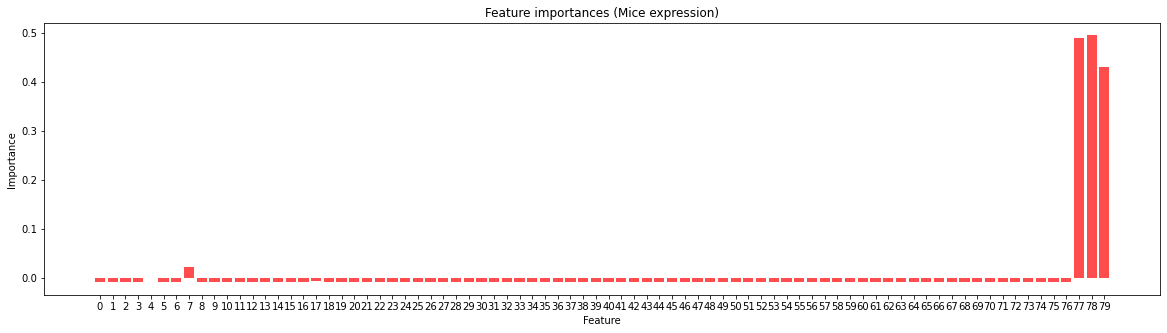

In [51]:
# Feature importances
f = []
for j in range(X_test.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)
# Plot

plt.figure(figsize=(20, 5))
plt.bar(range(X_test.shape[1]), f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test.shape[1]))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances (Mice expression)")
plt.show()

From this plot we can say that the determiniton of class is highly predicted through the behaviour, 
genotype and treatment further we can say 7th (0-indexed) column is also playing its role in the predictions 

In [44]:
# K-fold f1_weighted

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K fold
kf = KFold(shuffle=True, n_splits=5) # To make a 5-fold CV

cv_results_kfold = cross_val_score(mlpc_tuned, X_test, np.argmax(y_test, axis=1), cv=kf, scoring= 'f1_weighted')

print("K-fold Cross Validation f1_weigted Results: ",cv_results_kfold)
print("K-fold Cross Validation f1_weigted Results Mean: ",cv_results_kfold.mean())

K-fold Cross Validation f1_weigted Results:  [1. 1. 1. 1. 1.]
K-fold Cross Validation f1_weigted Results Mean:  1.0


In [45]:
# K-fold accuracy

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K fold
kf = KFold(shuffle=True, n_splits=5) # To make a 5-fold CV

cv_results_kfold = cross_val_score(mlpc_tuned, X_test, np.argmax(y_test, axis=1), cv=kf, scoring= 'accuracy')

print("K-fold Cross Validation accuracy Results: ",cv_results_kfold)
print("K-fold Cross Validation accuracy Results Mean: ",cv_results_kfold.mean())

K-fold Cross Validation accuracy Results:  [1. 1. 1. 1. 1.]
K-fold Cross Validation accuracy Results Mean:  1.0


In [46]:
# Tune Model Prediction
# Prediction process of Final Model over test set
y_pred = mlpc_tuned.predict(X_test)

In [47]:
# %% f1 score
import sklearn.metrics as metrics
print("f1_weighted:",metrics.f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),average='weighted'))

# %% Accuracy

print("accuracy:",metrics.accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

f1_weighted: 1.0
accuracy: 1.0


In [48]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(model_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        42

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



In [49]:
# Confusion Matrix
# multilabel-indicator is not supported so np.argmax should be used!
model_conf = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(model_conf)

[[37  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 42]]


In [52]:
#%% ROC-AUC Curve

y_score = mlpc_tuned.predict_proba(X_test)

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 8 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [53]:
roc_auc

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 'micro': 1.0}

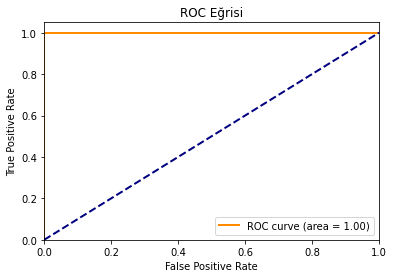

In [51]:
# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
plt.plot(fpr[3], tpr[3], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3]) # Drawing Curve according to 2. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

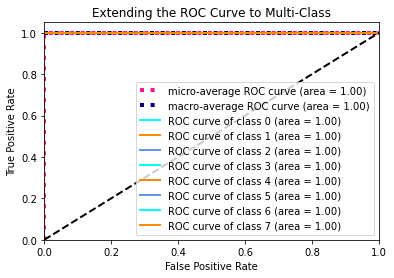

In [54]:
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()